In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [2]:
with open('1h-2.nmrium', 'r') as file:
    nmr_file = json.load(file)

In [3]:
test = nmr_file['spectra'][0]['data']
nmr_x = np.array(test['x'])
nmr_y = np.array(test['re'])

In [4]:
xrd = np.loadtxt('Analcime__R040128-1__Powder__Xray_Data_XY_RAW__348.txt', delimiter=', ', comments='#')
raman = np.loadtxt('Analcime__R040128-3__Raman__514__45__ccw__Raman_Data_RAW__2625.txt', delimiter=', ', comments='#')

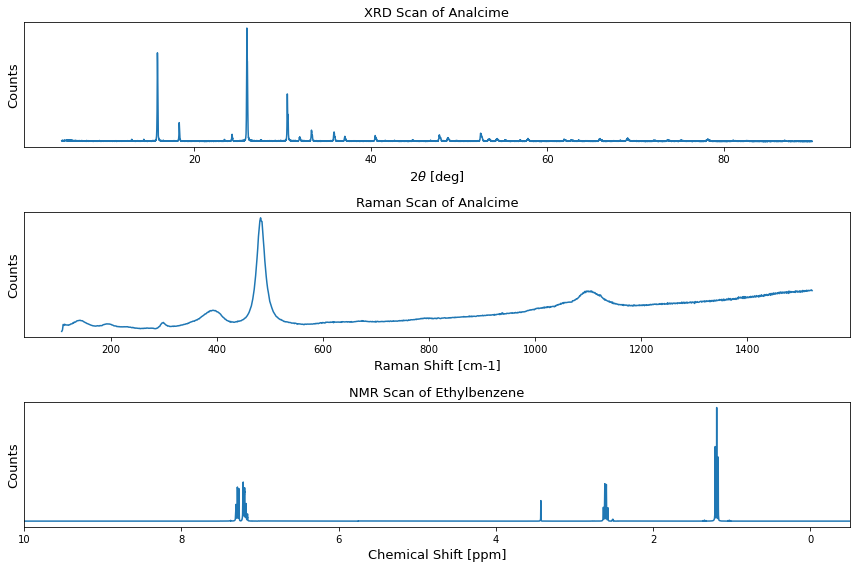

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(12,8))
ax[0].plot(xrd[:,0], xrd[:,1])
ax[0].set_yticks([])
ax[0].set_xlabel(r'$2\theta$ [deg]', fontsize=13)
ax[0].set_ylabel('Counts', fontsize=13)
ax[0].set_title('XRD Scan of Analcime', fontsize=13)
ax[1].plot(raman[:,0], raman[:,1])
ax[1].set_yticks([])
ax[1].set_xlabel('Raman Shift [cm-1]', fontsize=13)
ax[1].set_ylabel('Counts', fontsize=13)
ax[1].set_title('Raman Scan of Analcime', fontsize=13)
ax[2].plot(nmr_x, nmr_y)
ax[2].set_xlim(10,-.5 )
ax[2].set_yticks([])
ax[2].set_xlabel('Chemical Shift [ppm]', fontsize=13)
ax[2].set_ylabel('Counts', fontsize=13)
ax[2].set_title('NMR Scan of Ethylbenzene', fontsize=13)
fig.tight_layout()
#plt.savefig('comparison_spectra.eps', bbox_inches='tight')
plt.show()

In [6]:
print(np.mean(np.diff(xrd[:,0])))
print(np.mean(np.diff(raman[:,0])))
print(np.mean(np.diff(nmr_x)))

0.01
1.2788453887884268
0.0003136439906473883


In [7]:
raman[:,0].size

1107

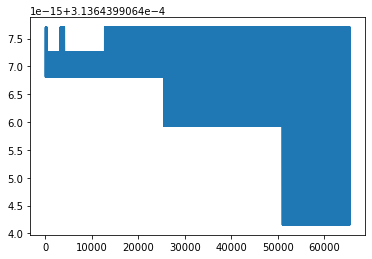

In [8]:
plt.plot(np.diff(nmr_x))

In [9]:
np.unique(np.diff(nmr_x), return_counts=True)

(array([0.00031364, 0.00031364, 0.00031364, 0.00031364, 0.00031364]),
 array([  745,  2618, 12801,  4714, 44657]))

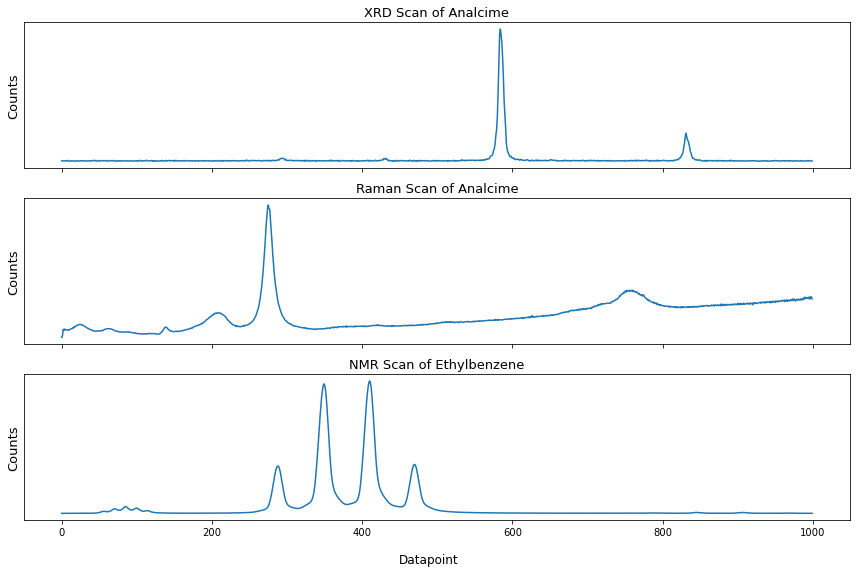

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(12,8), sharex=True)
ax[0].plot(np.arange(1000), xrd[500:1500,1])
ax[0].set_yticks([])
ax[0].set_ylabel('Counts', fontsize=13)
ax[0].set_title('XRD Scan of Analcime', fontsize=13)
ax[1].plot(np.arange(1000), raman[:1000,1])
ax[1].set_yticks([])
ax[1].set_ylabel('Counts', fontsize=13)
ax[1].set_title('Raman Scan of Analcime', fontsize=13)
ax[2].plot(np.arange(1000), nmr_y[21000:22000])
ax[2].set_yticks([])
ax[2].set_ylabel('Counts', fontsize=13)
ax[2].set_title('NMR Scan of Ethylbenzene', fontsize=13)
fig.supxlabel('Datapoint')
fig.tight_layout()
#plt.savefig('comparison_spectra_zoom.eps', bbox_inches='tight')
plt.show()

In [11]:
xrd2 = np.loadtxt('Analcime__R060023-1__Powder__Xray_Data_XY_RAW__2189.txt', delimiter=', ', comments='#')
raman2 = np.loadtxt('Analcime__R060023-3__Raman__514__45__ccw__Raman_Data_RAW__23776.txt', delimiter=', ', comments='#')

In [12]:
nmr_data2 = np.loadtxt('100-41-4.csv', skiprows=1, delimiter=',', comments='#')

In [13]:
nmr_y2 = np.zeros_like(nmr_y)
for i in range(nmr_data2.shape[0]):
    idx = np.where(np.isclose(nmr_x, nmr_data2[i,1], atol=0.0005))[0][0]
    assert idx.size == 1
    nmr_y2[idx] = nmr_data2[i,2]
nmr_y2 = gaussian_filter1d(nmr_y2, 4.)
nmr_y2 = nmr_y2 / np.max(nmr_y2) * 700

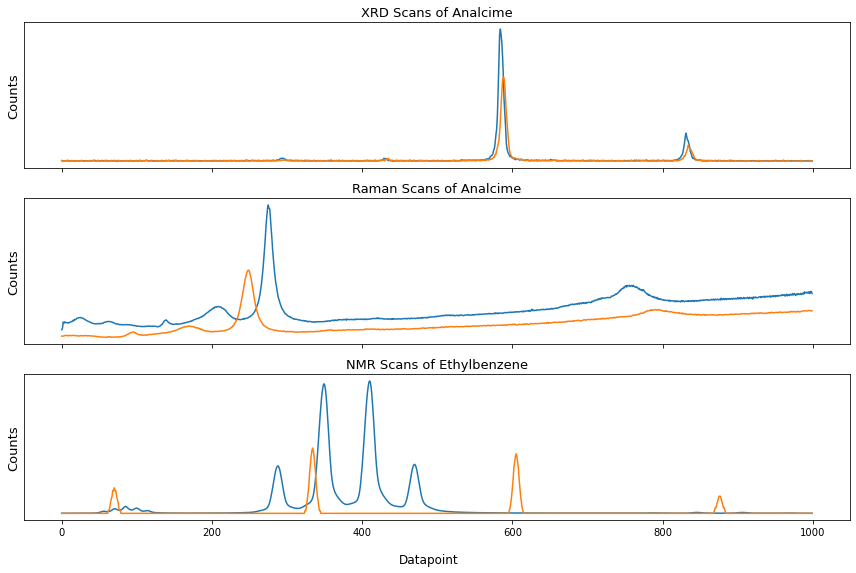

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(12,8), sharex=True)
ax[0].plot(np.arange(1000), xrd[500:1500,1])
ax[0].plot(np.arange(1000), xrd2[500:1500,1])
ax[0].set_yticks([])
ax[0].set_ylabel('Counts', fontsize=13)
ax[0].set_title('XRD Scans of Analcime', fontsize=13)
ax[1].plot(np.arange(1000), raman[:1000,1])
ax[1].plot(np.arange(1000), raman2[:1000,1])
ax[1].set_yticks([])
ax[1].set_ylabel('Counts', fontsize=13)
ax[1].set_title('Raman Scans of Analcime', fontsize=13)
ax[2].plot(np.arange(1000), nmr_y[21000:22000]/332825)
ax[2].plot(np.arange(1000), nmr_y2[21000:22000])
ax[2].set_yticks([])
ax[2].set_ylabel('Counts', fontsize=13)
ax[2].set_title('NMR Scans of Ethylbenzene', fontsize=13)
fig.supxlabel('Datapoint')
fig.tight_layout()
#plt.savefig('comparison_spectra_zoom.eps', bbox_inches='tight')
plt.show()